In [52]:
def romano(x):
    num = x
    t = ""
    
    if (x >= 4000) or (x<0):
        return("No es posible convertir el número a romanos")
    
    if (type(x)!=int):
        return("Error: El número no es entero")
    
    while num >= 1000:
        num = num - 1000
        t = t + "M"
    
    c = 0
    
    while num >= 500:
        c = c + 1
        num = num - 500
        t = t + "D"
    if c==4:
        t = t[:-4]
        t = t + "DM"
        
    c = 0
    while num >= 100:
        c = c + 1
        num = num - 100
        t = t + "C"
    if c==4:
        t = t[:-4]
        t = t + "CD"
          
    c = 0 
    while num >= 50:
        c = c + 1
        num = num - 50
        t = t + "L"
    if c==4:
        t = t[:-4]
        t = t + "LC"
       
    c=0
    
    while num >= 10:
        c = c + 1
        num = num - 10
        t = t + "X"
    if c==4:
        t = t[:-4]
        t = t + "XL"
    
    c = 0
    
    while num >= 5:
        c = c +1
        num = num - 5
        t = t + "V"
    if c==4:
        t = t[:-4]
        t = t + "VX"
    
    c = 0
    
    while num >= 1:
        num = num - 1
        t = t + "I"
        c = c + 1
    if c==4:
        t = t[:-4]
        t = t + "IV"
        
    t = t.replace("VIV","IX")
    t = t.replace("LXL","XC")
    t = t.replace("DCD","CD")
          
    return(t)

In [66]:
%%timeit -n1000 -r1

r = []
for i in range(1,4000):
    r.append(romano(i))

14.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)


In [61]:
numbs = [['','I','II','III','IV','V','VI','VII','VIII','IX'], ['','X','XX','XXX','XL','L','LX','LXX','LXXX','XC'],['','C','CC','CCC','CD','D','DC','DCC','DCCC','CM'],['','M','MM','MMM']]
def numb_to_roman(numb):
    i = 0
    r = ''
    while (numb > 0):
        r = numbs[i][numb%10] + r
        i += 1
        numb //= 10
    return r

In [67]:
%%timeit -n1000 -r1

r = []
for i in range(1,4000):
    r.append(numb_to_roman(i))

5.04 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)


# Face Recognition

In [87]:
import os
import cv2
import face_recognition
import numpy as np
from matplotlib import pyplot as plt

In [76]:
%cd /Users/usuario/Desktop/

/Users/usuario/Desktop


In [132]:
image = face_recognition.load_image_file("the-office-nbc.png")
face_locations = face_recognition.face_locations(image)
face_locations

[(246, 768, 320, 693),
 (226, 613, 315, 524),
 (101, 1089, 163, 1027),
 (337, 395, 412, 320),
 (146, 328, 221, 254),
 (225, 1144, 288, 1082),
 (115, 868, 177, 805),
 (130, 561, 182, 510),
 (79, 237, 122, 194),
 (135, 176, 198, 114),
 (87, 709, 149, 646),
 (46, 385, 82, 349),
 (412, 923, 474, 861)]

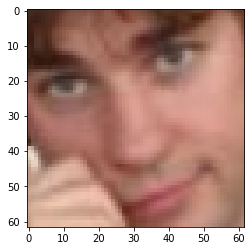

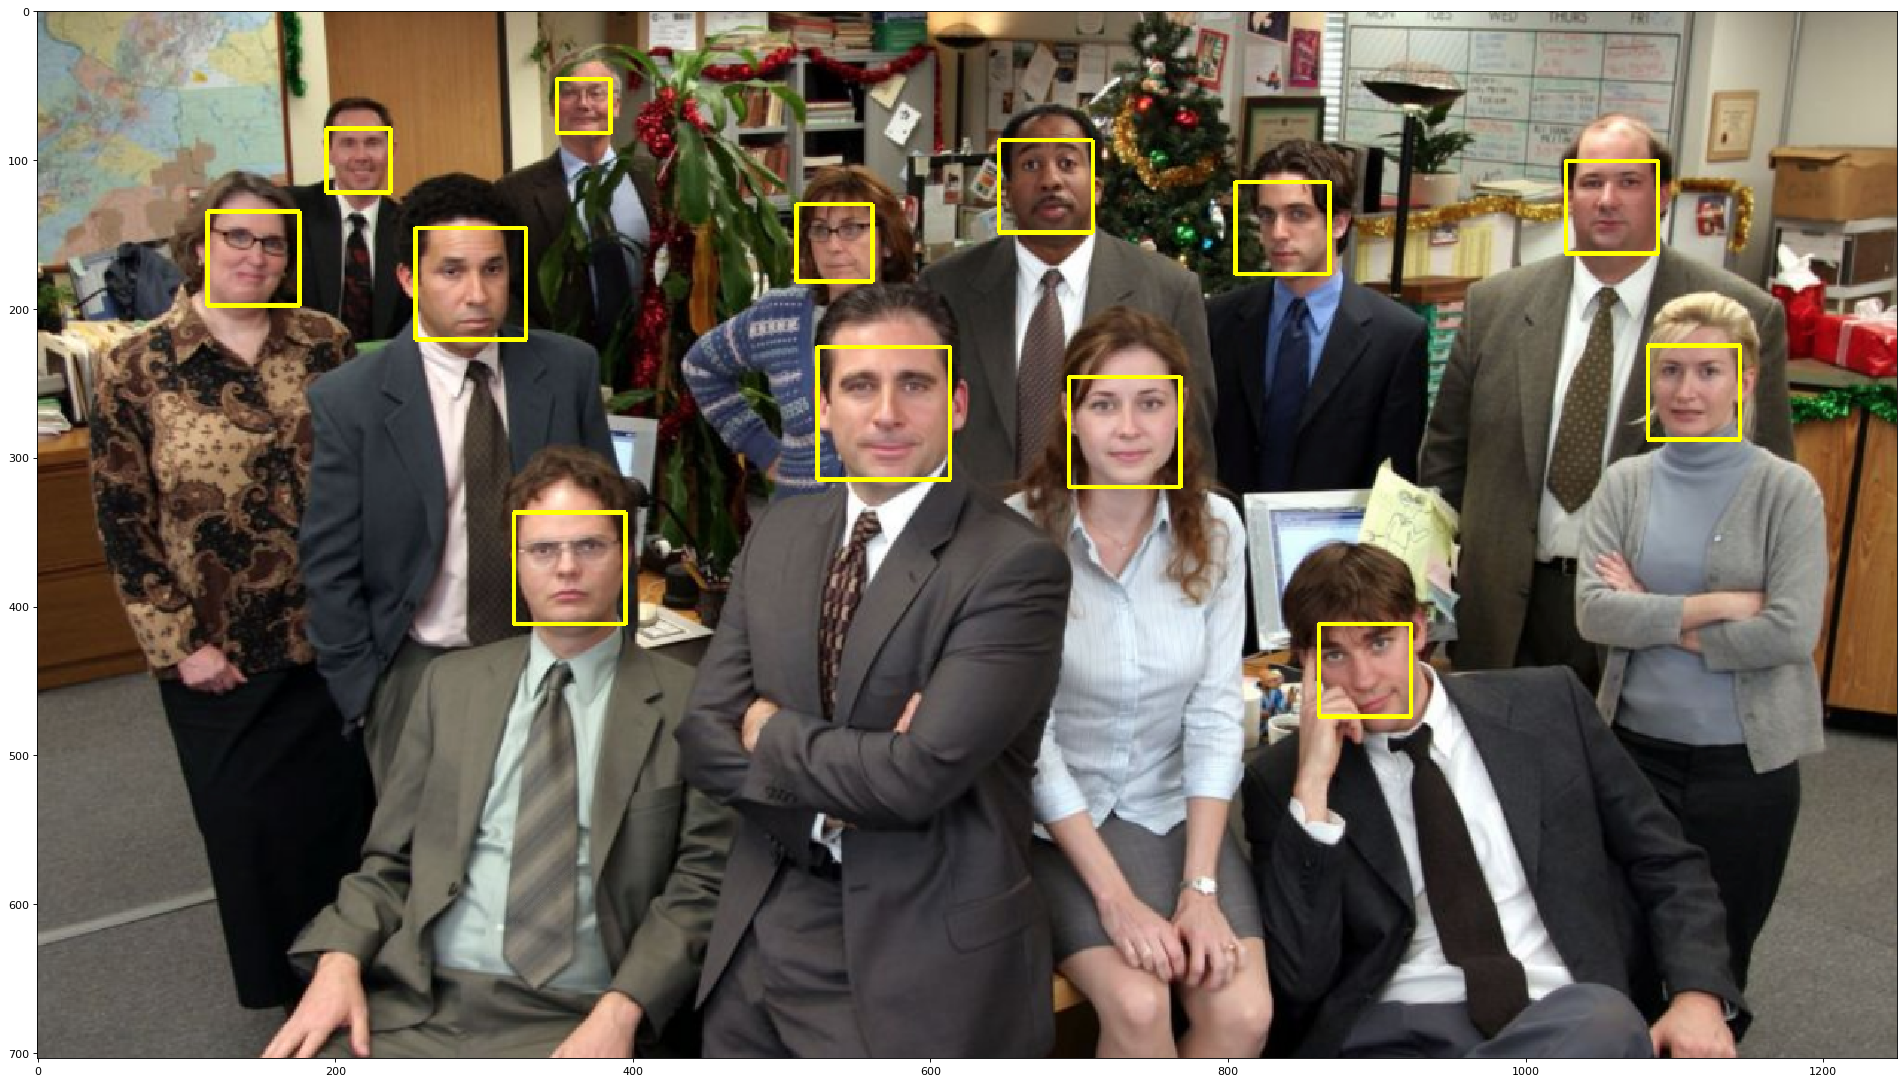

In [133]:
image_without_bb = image.copy()
for i in range(len(face_locations)):
    top = face_locations[i][0]
    right = face_locations[i][1]
    bottom = face_locations[i][2]
    left = face_locations[i][3]

    img_bb = cv2.rectangle(image, (left, bottom), (right, top), (255, 255, 0), 2)
    
    crop_img = image_without_bb[top:bottom, left:right]
    #print(crop_img)
    plt.imshow(crop_img)
    
    
plt.figure(num=None, figsize=(30, 40), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(111)
plt.imshow(img_bb)    

In [138]:
known_image = face_recognition.load_image_file("MichaelScott1.png")
unknown_image = face_recognition.load_image_file("MichaelScott2.jpg")

biden_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

results = face_recognition.face_distance([biden_encoding], unknown_encoding)
results

array([0.37553734])

In [ ]:
import face_recognition
import cv2
import numpy as np

# This is a demo of running face recognition on live video from your webcam. It's a little more complicated than the
# other example, but it includes some basic performance tweaks to make things run a lot faster:
#   1. Process each video frame at 1/4 resolution (though still display it at full resolution)
#   2. Only detect faces in every other frame of video.

# PLEASE NOTE: This example requires OpenCV (the `cv2` library) to be installed only to read from your webcam.
# OpenCV is *not* required to use the face_recognition library. It's only required if you want to run this
# specific demo. If you have trouble installing it, try any of the other demos that don't require it instead.

# Get a reference to webcam #0 (the default one)
video_capture = cv2.VideoCapture(0)

# Load a sample picture and learn how to recognize it.
obama_image = face_recognition.load_image_file("obama.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

# Load a second sample picture and learn how to recognize it.
biden_image = face_recognition.load_image_file("biden.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "Barack Obama",
    "Joe Biden"
]

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Resize frame of video to 1/4 size for faster face recognition processing
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_small_frame = small_frame[:, :, ::-1]

    # Only process every other frame of video to save time
    if process_this_frame:
        # Find all the faces and face encodings in the current frame of video
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"

            # # If a match was found in known_face_encodings, just use the first one.
            # if True in matches:
            #     first_match_index = matches.index(True)
            #     name = known_face_names[first_match_index]

            # Or instead, use the known face with the smallest distance to the new face
            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]

            face_names.append(name)

    process_this_frame = not process_this_frame


    # Display the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()

In [ ]:
if not os.path.exists('/Users/danielmartinez/Documents/Computer Vision/Procesadas/' + video_tag + '_Compilation'): 
    os.makedirs('/Users/danielmartinez/Documents/Computer Vision/Procesadas/' + video_tag + '_Compilation')

import os
import imageio

images = []
for img_index in range(N):
    images.append(imageio.imread(f'/Users/danielmartinez/Documents/Computer Vision/Procesadas/Prueba_V2_Pasted/{img_index}.jpg'))
imageio.mimsave(f'/Users/danielmartinez/Documents/Computer Vision/Procesadas/Prueba_V2_Compilation/Video_Window_{window}.mp4', images,fps = 24.036)
imageio.mimsave(f'/Users/danielmartinez/Documents/Computer Vision/Procesadas/Prueba_V2_Compilation/Video_Window_{window}.gif', images, duration = 8.612081877184224)

In [ ]:
#Frame 
cap = cv2.VideoCapture('')

currentframe = 0
  
while(True): 
      
    #Reading from frame 
    ret, frame = cap.read() 
  
    if ret: 
        #If video is still left continue creating images 
        name = '/Users/danielmartinez/Documents/Computer Vision/Procesadas/' + video_tag + '/' + str(currentframe) + '.jpg'
        print ('Creating...' + name) 
  
        #Writing the extracted images 
        cv2.imwrite(name, frame) 
  
        #Increasing counter so that it will 
        #Show how many frames are created 
        currentframe += 1
    else: 
        break